1. Загрузити файл з даними про споживання енергії “En_In.xls”, який являє собою перелік показників енергозабезпечення та виробництва відновлюваної електроенергії, і ввести їх в DataFrame.  

Майте на увазі, що це файл Excel, а не .csv. Також необхідно НЕ включати інформацію з нижніх та верхніх рядків файлу даних. Перші два стовпці непотрібні, тому їх необхідно виключити із датафрейму, а також поміняти мітки стовпців так, щоб вони були такими:  
['Country', 'Energy Supply', 'Energy Supply per Capita', '%Renewable]

In [1]:
import numpy as np
import pandas as pd

energy = pd.read_excel('En_In.xls', 
                       skiprows=range(17), 
                       usecols="C:F", 
                       nrows=227, 
                       names=['Country', 'Energy Supply', 'Energy Supply per Capita', '%Renewable'])

2. Переведіть дані із стовпчику ‘Energy Supply’ в гДж (Примітка: в 1ПДж = 1000000 ГДж). Для всіх країн, у яких відсутні дані (наприклад, дані з "..."), переконайтеся, що це відображається як значення np.NaN.

In [2]:
energy['Energy Supply'] = energy['Energy Supply'].apply(
    lambda x: np.NaN if (str(x) == '...') else x * 1000000)
energy['Energy Supply per Capita'] = energy['Energy Supply per Capita'].apply(
    lambda x: np.NaN if (str(x) == '...') else x)

3. Перейменуйте наступний список країн:  
"Republic of Korea": "South Korea",  
"United States of America": "United States", 
"United Kingdom of Great Britain and Northern Ireland": "UnitedKingdom",  
"China, Hong Kong Special Administrative Region": "Hong Kong"

In [10]:
energy.loc[energy['Country'] == 'Republic of Korea', 'Country'] = "South Korea"
energy.loc[energy['Country'] == 'United States of America', 'Country'] = "United States"
energy.loc[energy['Country'] == 'United Kingdom of Great Britain and Northern Ireland', 'Country'] = "United Kingdom"
energy.loc[energy['Country'] == 'China, Hong Kong Special Administrative Region', 'Country'] = "Hong Kong"

4. Існує також декілька країн, що мають в назві цифри та/або дужки.
Обов’язково видаліть їх, напр. 'Bolivia (Plurinational State of)' повинна бути ‘Bolivia’, ‘Switzerland17’ повинна бути Switzerland’.

In [4]:
def str_country(s):
    res = ''
    for c in s:
        if c.isdigit() or c == '(':
            break
        else:
            res += c
    return res.strip()


energy['Country'] = energy['Country'].apply(str_country)

In [5]:
pd.options.display.float_format = '{:.3f}'.format
energy.loc[energy['Country'].isin(['American Samoa', 'South Korea', 'Bolivia'])]

,Country,Energy Supply,Energy Supply per Capita,%Renewable
3,American Samoa,nan,nan,0.641
24,Bolivia,336000000.000,32.000,31.477
164,South Korea,11007000000.000,221.000,2.279


5. Далі, завантажте дані про ВВП з файлу „gpd.csv”, що містить дані Світового банку про ВВП країн від 1960 до 2015 року. Обов’язково не включайте заголовок до датафрейму і перейменуйте наступний список країн:  
"Korea, Rep.": "South Korea",  
"Iran, Islamic Rep.": "Iran",  
"Hong Kong SAR, China": "Hong Kong"  

In [6]:
gpd = pd.read_csv('gpd.csv', skiprows=range(4))
 
gpd.loc[gpd['Country Name'] == 'Korea, Rep.', 'Country Name'] = "South Korea"
gpd.loc[gpd['Country Name'] == 'Iran, Islamic Rep.', 'Country Name'] = "Iran"
gpd.loc[gpd['Country Name'] == 'Hong Kong SAR, China', 'Country Name'] = "Hong Kong"

gpd.head(1)

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
0,Aruba,ABW,GDP at market prices (constant 2010 US$),NY.GDP.MKTP.KD,nan,nan,nan,nan,nan,nan,...,nan,nan,nan,nan,2467703910.615,nan,nan,nan,nan,nan


6. Завантажте дані з файлу „scimagojr.xlsx”, який класифікує країни на основі
їхніх публікацій в журналах у галузі енергетичного машинобудування та
енергетичних технологій.

In [7]:
sjr = pd.read_excel('scimagojr.xlsx', engine='openpyxl')
sjr.head(3)

,Rank,Country,Documents,Citable documents,Citations,Self-citations,Citations per document,H index
0,1,China,127050,126767,597237,411683,4.700,138
1,2,United States,96661,94747,792274,265436,8.200,230
2,3,Japan,30504,30287,223024,61554,7.310,134


7. Приєднайте три набори даних із завдань 1-6 до нового набору даних
(використовуючи перетин назв країн).
- Використовуйте лише дані про ВВП за останні 10 років (2006-2015 рр.) і
лише 15 найкращих країн за рейтингом Scimagojr (Rank від 1 до 15)
- Індексом цього DataFrame повинна бути назва країни, а стовпцями мають
бути ['Rank', 'Documents', 'Citable documents', 'Citations', 'Self-citations',
'Citations per document', 'H index', 'Energy Supply', 'Energy Supply per Capita', '%
Renewable', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014',
'2015'].
Ви повинні отримати DataFrame з 15 рядками та 20 стовпцями.

In [8]:
gpd_new = gpd.set_index('Country Name')
gpd_new = gpd_new.loc[:, '2006':'2015']

In [11]:
result = pd.merge(sjr[sjr['Rank'] <= 15], energy, on="Country")
result = result.set_index('Country')
result = result.join(gpd_new)
result.head(3)

,Rank,Documents,Citable documents,Citations,Self-citations,Citations per document,H index,Energy Supply,Energy Supply per Capita,%Renewable,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
Country,,,,,,,,,,,,,,,,,,,,
China,1,127050,126767,597237,411683,4.700,138,127191000000.000,93.000,19.755,3992331462570.890,4559041383517.930,4997775145605.960,5459247267275.140,6039658508485.590,6612490294273.650,7124977970399.610,7672447738017.420,8230120617793.520,8797998940421.279
United States,2,96661,94747,792274,265436,8.200,230,90838000000.000,286.000,11.571,14792303791800.000,15055395304800.000,15011490541400.000,14594842181900.000,14964372000000.000,15204019634600.000,15542161722300.000,15773666098800.000,16156618476000.000,16548573278300.000
Japan,3,30504,30287,223024,61554,7.310,134,18984000000.000,149.000,10.233,5496541517363.310,5617035943770.730,5558526873313.820,5251308399909.320,5498717815809.770,5473738114222.050,5569101602926.180,5644658523313.420,5642884448582.190,5669563143140.970


In [12]:
result.shape

(15, 20)

8. Створіть функцію, щоб визначити середній ВВП країн за останні 10 років.
Ця функція повинна повертати об’єкт Series з 15 країнами та їх середній
ВВП, відсортований за спаданням.

In [13]:
def task_eight():
    avg_gdp = result.loc[:, '2006':'2015'].mean(1).sort_values(ascending=False)
    return avg_gdp

task_eight()

Country
United States        15364344302990.000
China                 6348608932836.100
Japan                 5542207638235.176
Germany               3493025339072.848
France                2681724635761.589
United Kingdom        2487906661418.417
Brazil                2189794143774.905
Italy                 2120175089933.776
India                 1769297396603.860
Canada                1660647466307.512
Russian Federation    1565459478480.661
Spain                 1418078278145.694
Australia             1164042729991.427
South Korea           1106714508244.852
Iran                   444155754051.095
dtype: float64

9. Створіть функцію, щоб визначити, наскільки змінився ВВП за останні 10
років для країни з 5-м середнім ВВП.
Ця функція повинна повертати кортеж із назвою країни та значенням, на
яке змінився ВВП.

In [14]:
def task_nine():
    country5 = tuple(task_eight().items())[4][0]
    return (country5, abs(result.loc[country5, '2015'] - result.loc[country5, '2006']))


task_nine()

('France', 153345695364.24023)

10. Створіть функцію, щоб визначити, в якій країні встановлено максимум
поновлюваних джерел енергії (% Renewable) та який саме відсоток. Ця функція повинна повертати кортеж із назвою країни та відсотком.

In [15]:
def task_ten():
    return tuple(result.sort_values(by='%Renewable')['%Renewable'].tail(1).items())[0]

task_ten()

('Brazil', 69.64803)

11. Створіть стовпець, в якому оцінюється чисельність населення. Для пошуку оцінки використовуйте значення енергопостачання (Energy Supply)
та енергопостачання на душу населення (Energy Supply per Capita). Яка країна є шостою за цією оцінкою? Ця функція повинна повертати кортеж із назвою країни та населенням

In [16]:
def task_eleven():
    result['population'] = result['Energy Supply'] / result['Energy Supply per Capita']
    return tuple(result['population'].sort_values(ascending=False).items())[5]


task_eleven()

('Japan', 127409395.97315437)

12. Створіть стовпець, в якому оцінюється кількість цитованих документів на
одну особу. Який взаємозв'язок між кількістю цитованих документів на
душу населення та енергозабезпеченням на душу населення? Використовуйте
метод .corr () (кореляція Пірсона).
Ця функція повинна повертати одне число

In [17]:
def task_twelve():
    result['Citable documents per Capita'] = result['Citable documents'] / result['population']
    return result[['Citable documents per Capita', 'Energy Supply per Capita']].corr().iloc()[1][0]


task_twelve()

0.7940010435442943

13. Створіть новий стовпчик в який занесіть 1, якщо значення %
відновлюваної енергії (% Renewable) країни дорівнює або вище медіани для
всіх країн, і 0, якщо значення (% Renewable) нижче медіани.
Ця функція повинна повертати Series, індексом якого є назва країни,
відсортована у порядку зростання Rank

In [18]:
def task_thirteen():
    result['More renewable'] = result['%Renewable'].apply(lambda x: 1 if x >= result['%Renewable'].median() else 0)    
    return result['More renewable']


task_thirteen()

Country
China                 1
United States         0
Japan                 0
United Kingdom        0
Russian Federation    1
Canada                1
Germany               1
India                 0
France                1
South Korea           0
Italy                 1
Spain                 1
Iran                  0
Australia             0
Brazil                1
Name: More renewable, dtype: int64

14. Використайте наступний словник, щоб згрупувати країни за
континентами, потім створіть DataFrame, який відображає розмір вибірки
(кількість країн на кожному континенті), а також суму, середнє та стандартне
відхилення для оцінки кількості населення для кожної країни.
ContinentDict = {'China':'Asia',
'United States':'North America',
'Japan':'Asia',
'United Kingdom':'Europe',
'Russian Federation':'Europe',
'Canada':'North America',
'Germany':'Europe',
'India':'Asia',
'France':'Europe',
'South Korea':'Asia',
'Italy':'Europe',
'Spain':'Europe',
'Iran':'Asia',
'Australia':'Australia',
'Brazil':'South America'}

Ця функція повинна повертати DataFrame з індексом, що має ім’я Continent
['Asia', 'Australia', 'Europe', 'North America', 'South America'] та стовпцями
['size', 'sum', 'mean', 'std '].

In [19]:
def task_fourteen():
    ContinentDict = {'China':'Asia', 'United States':'North America', 'Japan':'Asia', 'United Kingdom':'Europe', 'Russian Federation':'Europe', 'Canada':'North America', 'Germany':'Europe', 'India':'Asia', 'France':'Europe', 'South Korea':'Asia', 'Italy':'Europe', 'Spain':'Europe', 'Iran':'Asia', 'Australia':'Australia', 'Brazil':'South America'}
    return result.groupby(ContinentDict)['population'].agg(['size', 'sum', 'mean', 'std'])


task_fourteen()

,size,sum,mean,std
Asia,5,2898666386.611,579733277.322,679097888.366
Australia,1,23316017.316,23316017.316,nan
Europe,6,457929667.216,76321611.203,34647667.066
North America,2,352855249.480,176427624.740,199669644.857
South America,1,205915254.237,205915254.237,nan


15. Створіть бульбашкову діаграму, що відображає залежність % поновлюван
их джерел від рейтингу країни (% Renewable vs. Rank). Розмір бульбашки від
повідає ВВП країн 2015 року, а колір відповідає континенту.

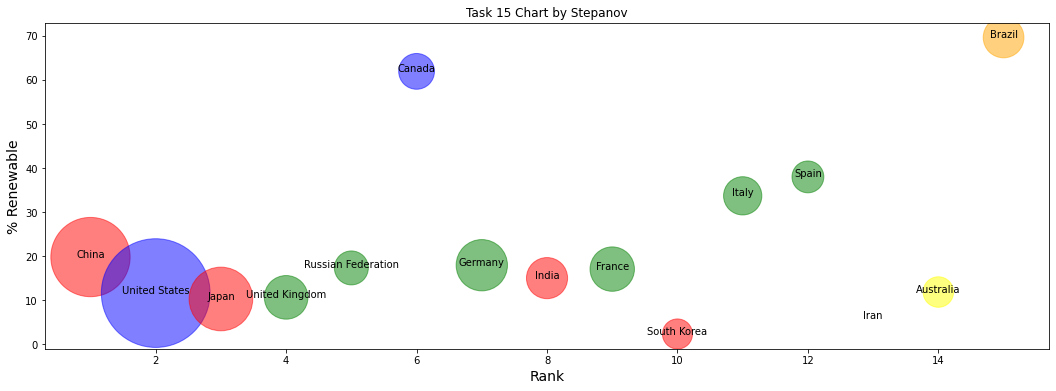

In [20]:
import matplotlib.pyplot as plt

colors = ['red', 'blue', 'red', 'green', 'green', 'blue', 'green', 'red', 'green', 'red', 'green', 'green', 'red', 'yellow', 'orange']

plt.figure(figsize=(18, 6))
plt.scatter(result['Rank'], result['%Renewable'], s=result['2015']/1400000000, color=colors, alpha=0.5)

for i in range(15):
    plt.annotate(result.iloc()[i].name, xy=(result.iloc()[i]['Rank'], result.iloc()[i]['%Renewable']), ha='center')

plt.xlabel("Rank", size=14)
plt.ylabel("% Renewable", size=14)
plt.title("Task 15 Chart by Stepanov")
plt.show()